In [ ]:
!pip3 install arch yfinance pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting unin

In [ ]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# auto arima
# from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-46a88ee734dc>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/TimeSeriesAnalysis_CBDT/TS.csv'

In [ ]:
# data = pd.read_excel("Manufacturing_series.xlsx", sheet_name='ATC_Manufacturing')
# data = pd.read_csv(path, dtype = {'Total_Amount' : 'Int64'})
data = pd.read_csv(path)

In [ ]:
data.head()

,Unnamed: 0,YRMNTH,Entity_Type,Ntr_Of_Bsns_Sctr1,MINR_HD_CD,Total_Amount
0,1,200504,Company,Manufacturing,100,2.994772e+08
1,2,200505,Company,Manufacturing,100,6.146762e+08
2,3,200506,Company,Manufacturing,100,3.294779e+10
3,4,200507,Company,Manufacturing,100,4.991208e+08
4,5,200508,Company,Manufacturing,100,4.237177e+08


In [ ]:
Time_Stamp = pd.date_range(start='2005-04-01',periods=len(data),freq='M')

data['Time_Stamp'] = Time_Stamp

data_copy = data.copy()

data.set_index(keys='Time_Stamp',inplace=True) #set timestamp index

data=data[['Total_Amount']]
data.head(), data.shape

(            Total_Amount
 Time_Stamp              
 2005-04-30  2.994772e+08
 2005-05-31  6.146762e+08
 2005-06-30  3.294779e+10
 2005-07-31  4.991208e+08
 2005-08-31  4.237177e+08, (213, 1))

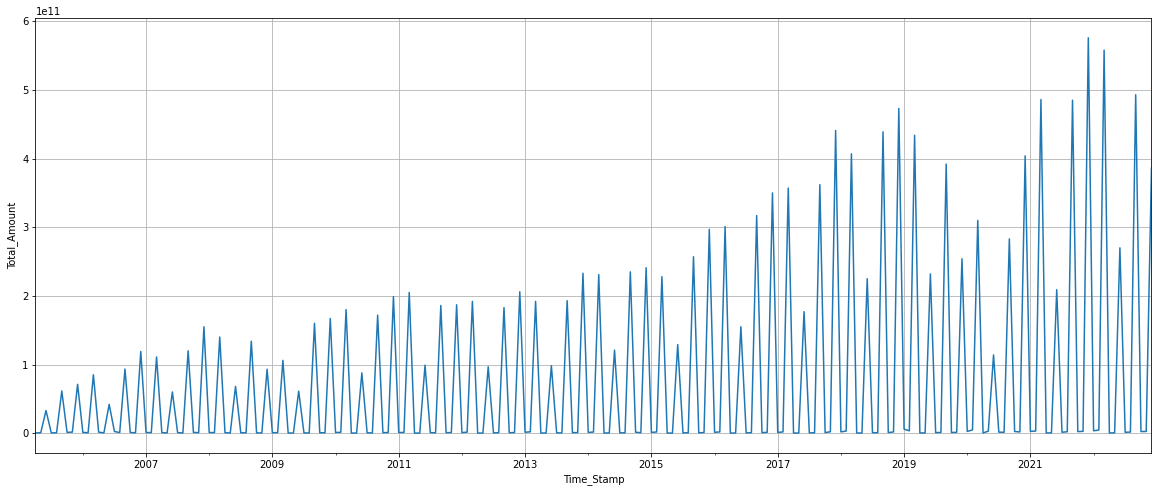

In [ ]:
#plot the graph

# plt.figure(figsize=(20,8))
# plt.ylabel("Total_Amount")
# data['Total_Amount'].plot(grid=True)
# plt.show()

data['Total_Amount'].plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")


In [ ]:
# data_copy.plot(x = "Time_Stamp", y = "Total_Amount", kind='scatter',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

<Figure size 2160x1440 with 0 Axes>

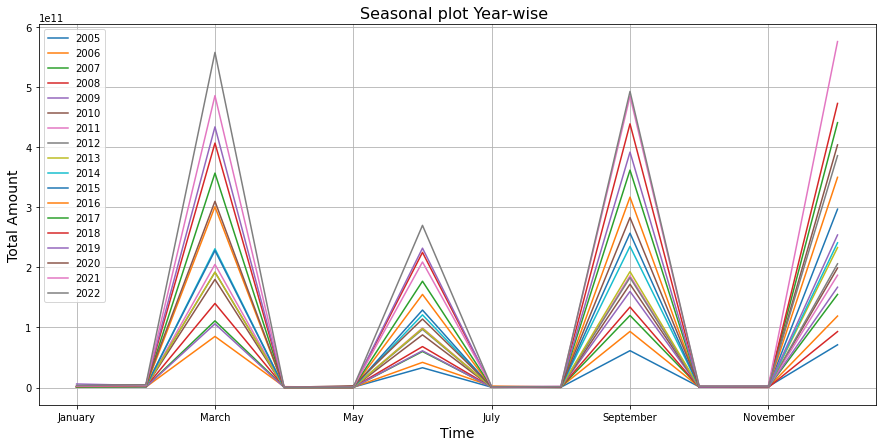

In [ ]:
## Plot 1: Seasonal plot Year-wise
plt.figure(figsize=(30,20))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(data, values = 'Total_Amount', columns = data.index.year,index = data.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
plt.title("Seasonal plot Year-wise ", fontsize=16)
plt.xlabel("Time", fontsize=14)

plt.ylabel("Total Amount", fontsize=14)
plt.show()

# yearly_sales_across_years

## Quarterly data

In [ ]:
data=data.resample('Q').sum()

<Figure size 2160x1440 with 0 Axes>

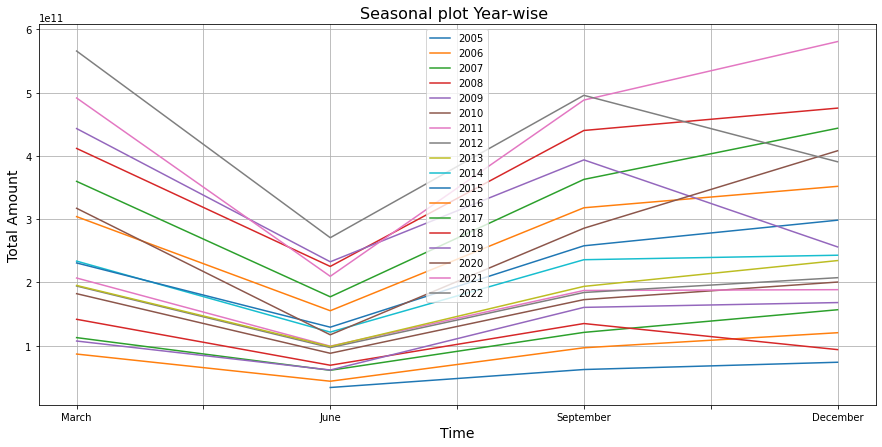

In [ ]:
## Plot 1: Seasonal plot Year-wise
plt.figure(figsize=(30,20))
months = ['March', 'June', 'September', 'December']
yearly_sales_across_years = pd.pivot_table(data, values = 'Total_Amount', columns = data.index.year,index = data.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
plt.title("Seasonal plot Year-wise ", fontsize=16)
plt.xlabel("Time", fontsize=14)

plt.ylabel("Total Amount", fontsize=14)
plt.show()

# yearly_sales_across_years

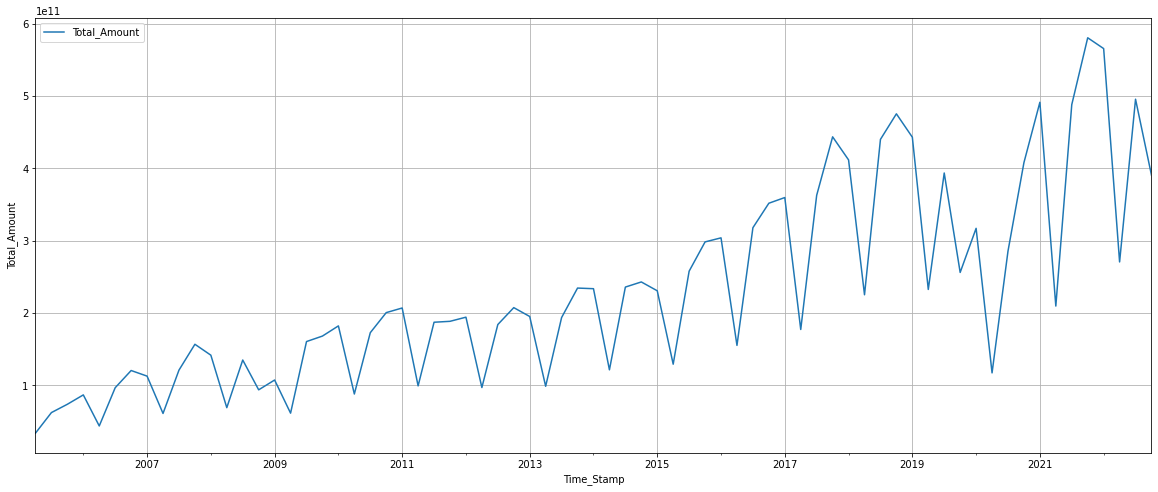

In [ ]:
# data_df.plot(x = "date", y = "Total_Amount", kind='scatter',figsize=(20,8),grid=True, ylabel="Total_Amount")
data.plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
data, data.shape

(            Total_Amount
 Time_Stamp              
 2005-06-30  3.386195e+10
 2005-09-30  6.229294e+10
 2005-12-31  7.379168e+10
 2006-03-31  8.675243e+10
 2006-06-30  4.378474e+10
 ...                  ...
 2021-12-31  5.808410e+11
 2022-03-31  5.658947e+11
 2022-06-30  2.707096e+11
 2022-09-30  4.958517e+11
 2022-12-31  3.907833e+11
 
 [71 rows x 1 columns], (71, 1))

Seasonal Decompose --> Naive Approach to decompose

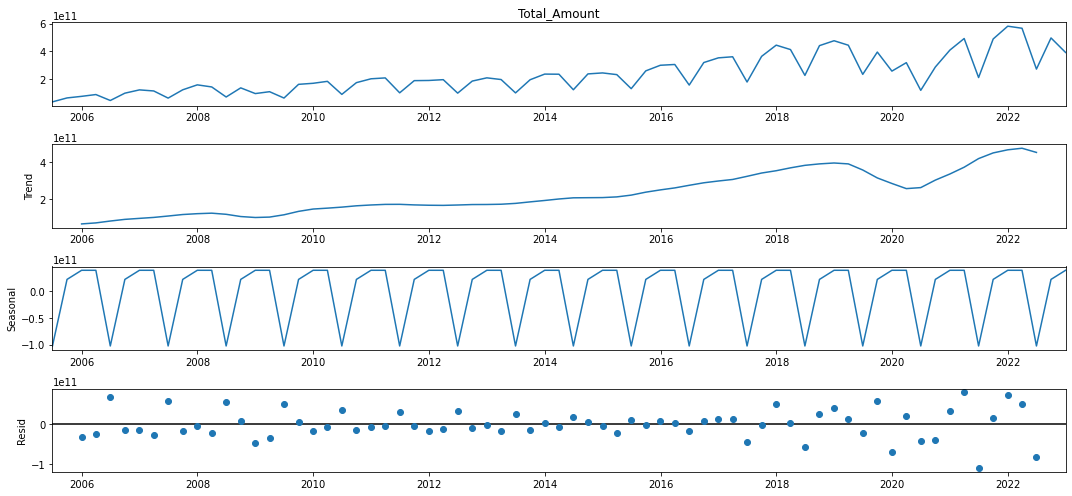

In [ ]:
from statsmodels.tsa.seasonal import   seasonal_decompose

# The additive model is Y[t] = T[t] + S[t] + e[t]
decomposition = seasonal_decompose(data['Total_Amount'],model='additive')
decomposition.plot();

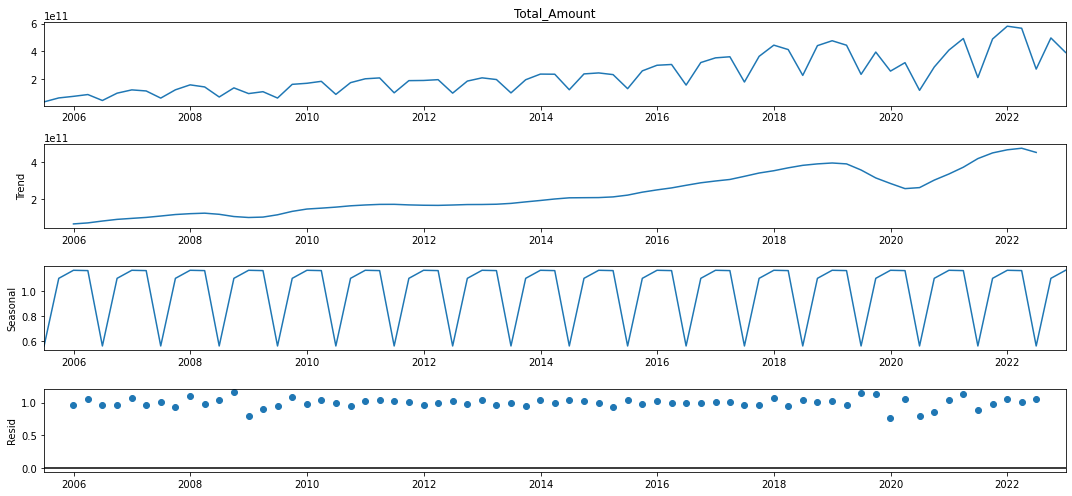

In [ ]:
from statsmodels.tsa.seasonal import   seasonal_decompose

# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(data['Total_Amount'],model='multiplicative')
decomposition.plot();

Separate the series into training and testing data on decided ratio. 

In [ ]:
# train=data['Total_Amount'][0:int(len(data)*0.8)]
# test=data['Total_Amount'][int(len(data)*0.8):]

In [ ]:
train=data['Total_Amount'][0:57]
test=data['Total_Amount'][57:]

In [ ]:
print("Train Head\n", train.head())
print("\n\n")
print("Train tail \n", train.tail())
print("\n\n")
print("Test Head\n", test.head())
print("\n\n")
print("Test tail \n", test.tail())

Train Head
 Time_Stamp
2005-06-30    3.386195e+10
2005-09-30    6.229294e+10
2005-12-31    7.379168e+10
2006-03-31    8.675243e+10
2006-06-30    4.378474e+10
Freq: Q-DEC, Name: Total_Amount, dtype: float64



Train tail 
 Time_Stamp
2018-06-30    2.252924e+11
2018-09-30    4.402793e+11
2018-12-31    4.756277e+11
2019-03-31    4.432842e+11
2019-06-30    2.326439e+11
Freq: Q-DEC, Name: Total_Amount, dtype: float64



Test Head
 Time_Stamp
2019-09-30    3.937645e+11
2019-12-31    2.561829e+11
2020-03-31    3.172099e+11
2020-06-30    1.171992e+11
2020-09-30    2.856904e+11
Freq: Q-DEC, Name: Total_Amount, dtype: float64



Test tail 
 Time_Stamp
2021-12-31    5.808410e+11
2022-03-31    5.658947e+11
2022-06-30    2.707096e+11
2022-09-30    4.958517e+11
2022-12-31    3.907833e+11
Freq: Q-DEC, Name: Total_Amount, dtype: float64


In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(train.diff().isna())

Time_Stamp
2005-06-30     True
2005-09-30    False
2005-12-31    False
2006-03-31    False
2006-06-30    False
2006-09-30    False
2006-12-31    False
2007-03-31    False
2007-06-30    False
2007-09-30    False
2007-12-31    False
2008-03-31    False
2008-06-30    False
2008-09-30    False
2008-12-31    False
2009-03-31    False
2009-06-30    False
2009-09-30    False
2009-12-31    False
2010-03-31    False
2010-06-30    False
2010-09-30    False
2010-12-31    False
2011-03-31    False
2011-06-30    False
2011-09-30    False
2011-12-31    False
2012-03-31    False
2012-06-30    False
2012-09-30    False
2012-12-31    False
2013-03-31    False
2013-06-30    False
2013-09-30    False
2013-12-31    False
2014-03-31    False
2014-06-30    False
2014-09-30    False
2014-12-31    False
2015-03-31    False
2015-06-30    False
2015-09-30    False
2015-12-31    False
2016-03-31    False
2016-06-30    False
2016-09-30    False
2016-12-31    False
2017-03-31    False
2017-06-30    False
2017-09-3

In [ ]:
len(train), len(train[~train.isna()]), len(train[train.diff().isna()]), len(train[~train.diff().isna()])

(57, 57, 1, 56)

test for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# train_log = np.log(train)
# train_log.plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
# LAG 0
dftest = adfuller(train,autolag='AIC', maxlag=4)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is 0.684
DF test p-value is 0.9895207501367755
Number of lags used 4


In [ ]:
# LAG 1
train_lag1 = train.diff(periods=1)[~train.diff(periods=1).isna()].copy()

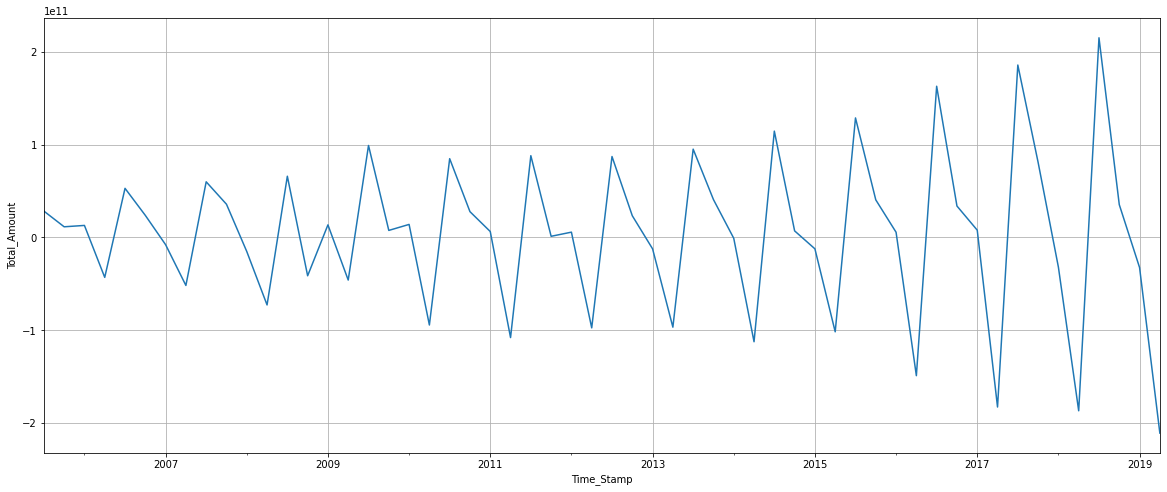

In [ ]:
train_lag1.plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
# train_lag1_Shift = train_lag1+2*10**11
# train_lag1_Shift.plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
# train_lag1_Shift_log = np.log(train_lag1_Shift)
# train_lag1_Shift_log.plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
dftest = adfuller(train_lag1,autolag='AIC', maxlag=4)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.211
DF test p-value is 0.01934136227902755
Number of lags used 3


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

ACF AND PACF

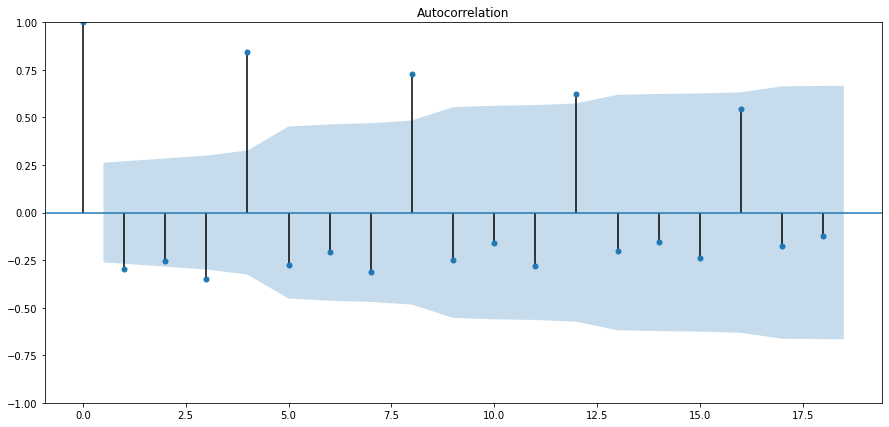

In [ ]:
plot_acf(train_lag1)
plt.show()

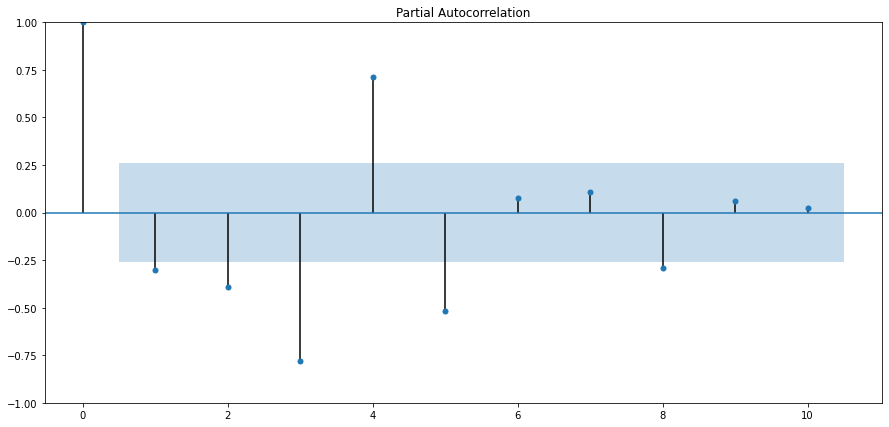

In [ ]:
plot_pacf(train_lag1, lags=10)
plt.show()

# plot_pacf(train_lag1)
# plt.show()

SARIMAX ADDITIVE 1

In [ ]:
import statsmodels.api as sm

In [ ]:
ar = (0,0,1)
ma =  (0,0,0,1)
mod = sm.tsa.statespace.SARIMAX(train, order=(ar,1,ma))

In [ ]:
res = mod.fit(disp=False)
print(res.summary())

                                SARIMAX Results                                 
Dep. Variable:             Total_Amount   No. Observations:                   57
Model:             SARIMAX([3], 1, [4])   Log Likelihood               -1474.699
Date:                  Wed, 04 Jan 2023   AIC                           2955.398
Time:                          07:30:27   BIC                           2961.474
Sample:                      06-30-2005   HQIC                          2957.753
                           - 06-30-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L3         -0.2962      0.291     -1.018      0.309      -0.867       0.274
ma.L4          0.7268      0.344      2.111      0.035       0.052       1.402
sigma2      7.861e+21   3.35e-23   2

Diff 1 and then Diff 4

In [ ]:
train_lag1_lag4 = train_lag1.diff(periods=4)[~train_lag1.diff(periods=4).isna()].copy()

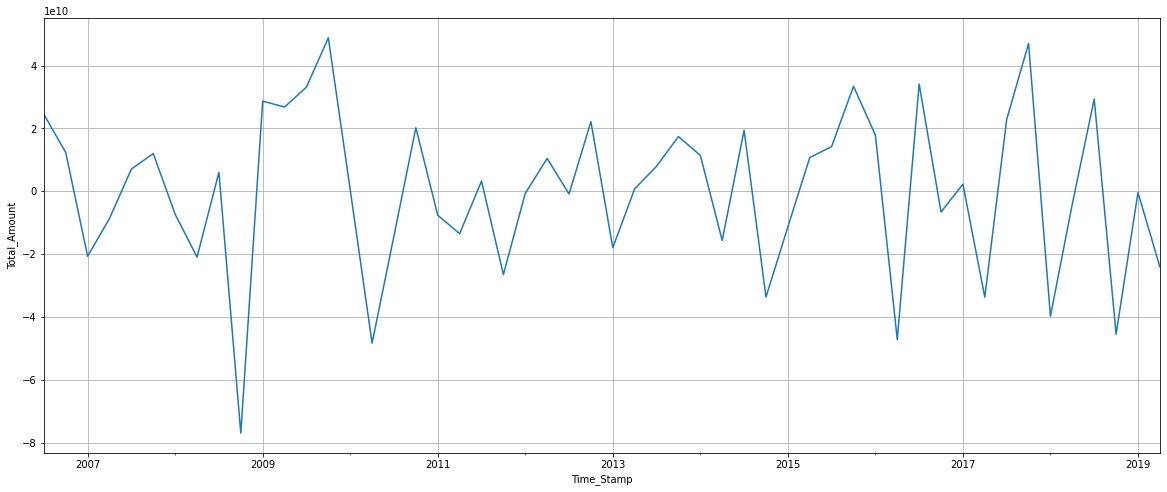

In [ ]:
train_lag1_lag4.plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
dftest = adfuller(train_lag1_lag4,autolag='AIC')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.965
DF test p-value is 2.8778147970491073e-12
Number of lags used 0


ACF AND PACF

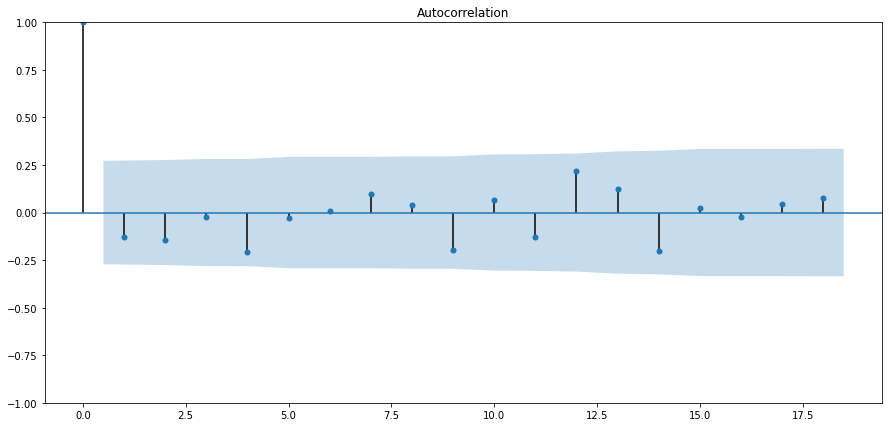

In [ ]:
plot_acf(train_lag1_lag4)
plt.show()

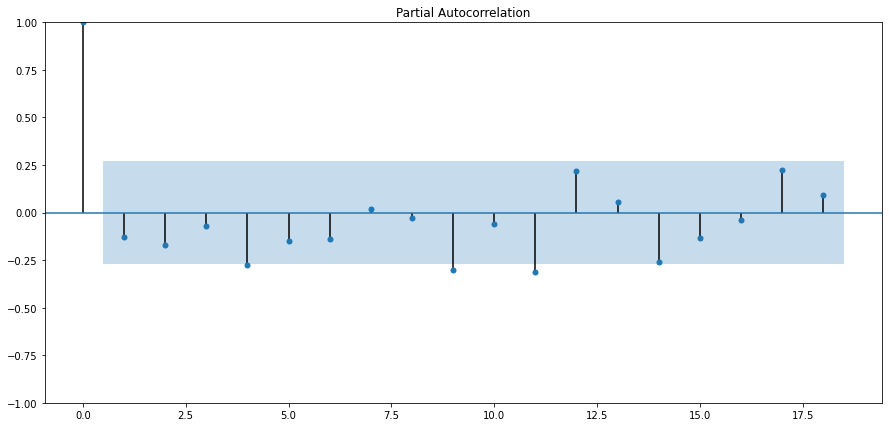

In [ ]:
plot_pacf(train_lag1_lag4)
plt.show()

SARIMAX MULTIPLICATIVE

In [ ]:
import statsmodels.api as sm

In [ ]:
# mod = sm.tsa.statespace.SARIMAX(train, order=(0,1,(0,0,1)), seasonal_order=(0,0,0,4))
mod = sm.tsa.statespace.SARIMAX(train, order=(0,1,0), seasonal_order=(0,1,0,4))

In [ ]:
res = mod.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      Total_Amount   No. Observations:                   57
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood               -1320.304
Date:                           Wed, 04 Jan 2023   AIC                           2642.609
Time:                                   07:30:28   BIC                           2644.560
Sample:                               06-30-2005   HQIC                          2643.357
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.021e+20   1.01e+20      5.979      0.000    4.05e+20    7.99e+20
Ljung-Box (L1) (Q):                   0.88 

In [ ]:
predict = res.predict(start=test.index[0], end=test.index[-1])

In [ ]:
mape_SARIMA=mean_absolute_percentage_error(test, predict)
mape_SARIMA

30.792437462825824

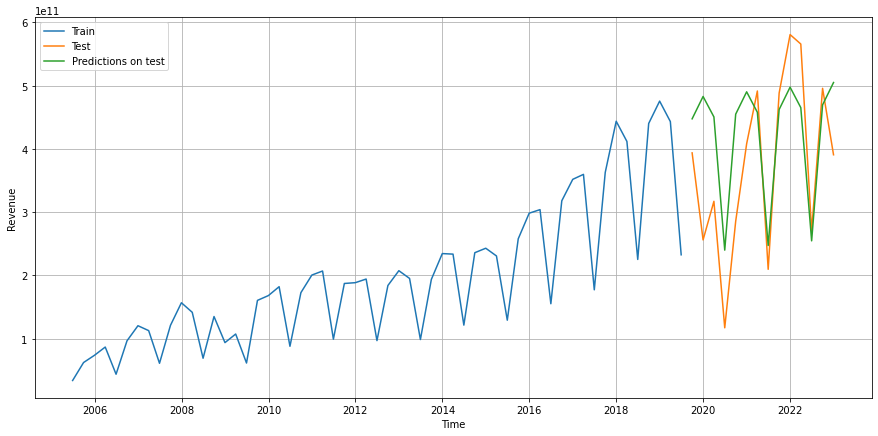

In [ ]:
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(predict, label='Predictions on test')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.grid();

AUTO ARIMA

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=4, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2642.609, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2643.324, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=2642.238, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=2642.176, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=2641.976, Time=0.11 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=2643.952, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=2643.960, Time=0.23 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=2641.527, Time=0.57 sec
 ARIMA(0,1,1)(3,1,1)[4]             : AIC=2642.357, Time=0.66 sec
 ARIMA(0,1,1)(2,1,2)[4]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=2640.126, Time=0.70 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=2643.719, Time=0.24 sec
 ARIMA(0,1,1)(1,1,3)[4]             : AIC=2642.106, Time=1.37 sec
 ARIMA(0,1,1)(0,1,3)[4]             : AIC=2644.452, Time=0.51 sec
 ARIMA(0,1,1)(2,1,3)[4]             : 

In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   57
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 4)   Log Likelihood               -1315.702
Date:                                Wed, 04 Jan 2023   AIC                           2639.405
Time:                                        07:37:42   BIC                           2647.210
Sample:                                    06-30-2005   HQIC                          2642.397
                                         - 06-30-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.9938      0.051     19.422      0.000       0.893       1.094
ma.S.L4       -1.3668      0.237     -5.763      0.000      -1.832      -0.902
ma.S.L8        0.4116      0.181      2.270      0.023       0.056       0.767
sigma2      6.249e+20        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.38   Prob(JB):                         0.23
Heteroskedasticity (H):               0.92   Skew:                            -0.55
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.72e+57. Standard errors may be unstable.
"""

In [ ]:
predict=Arima_model.predict(n_periods=len(test))

In [ ]:
mape_arima=mean_absolute_percentage_error(test, predict)
mape_arima

35.52732427161065

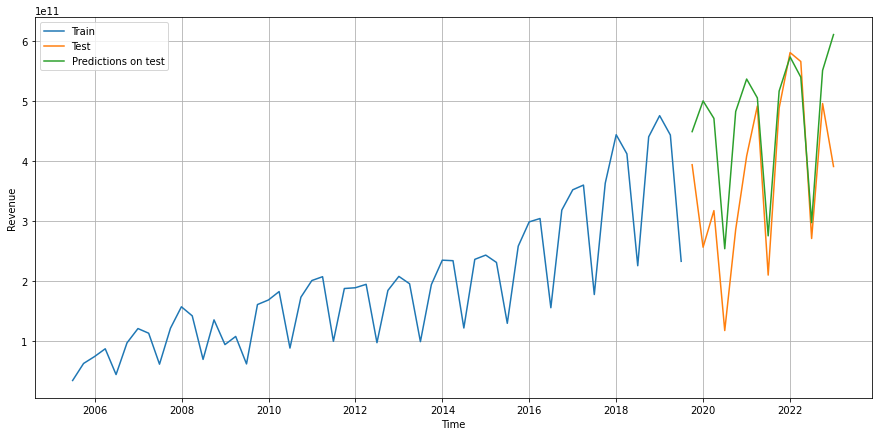

In [ ]:
rcParams['figure.figsize'] = 15,7
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(predict, label='Predictions on test')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.grid();

CACHE

SARIMAX ADDITIVE 2

In [ ]:
import statsmodels.api as sm

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train_lag1_lag4, order=(1,0,0)) 
# mod = sm.tsa.statespace.SARIMAX(train_lag1_lag4, order=(0,0,0))
# mod = sm.tsa.statespace.SARIMAX(train_lag1_lag4, order=(0,0,1))

In [ ]:
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:           Total_Amount   No. Observations:                   52
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1319.767
Date:                Wed, 04 Jan 2023   AIC                           2643.534
Time:                        08:43:03   BIC                           2647.437
Sample:                    09-30-2006   HQIC                          2645.031
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1282      0.150     -0.853      0.394      -0.423       0.166
sigma2      6.503e+20   3.72e-24   1.75e+44      0.000     6.5e+20     6.5e+20
Ljung-Box (L1) (Q):                   0.03   Jarque-

In [ ]:
predict = res.predict(start=test.index[0], end=test.index[-1])

In [ ]:
mape_arima=mean_absolute_percentage_error(test, predict)
mape_arima

99.95431181081271

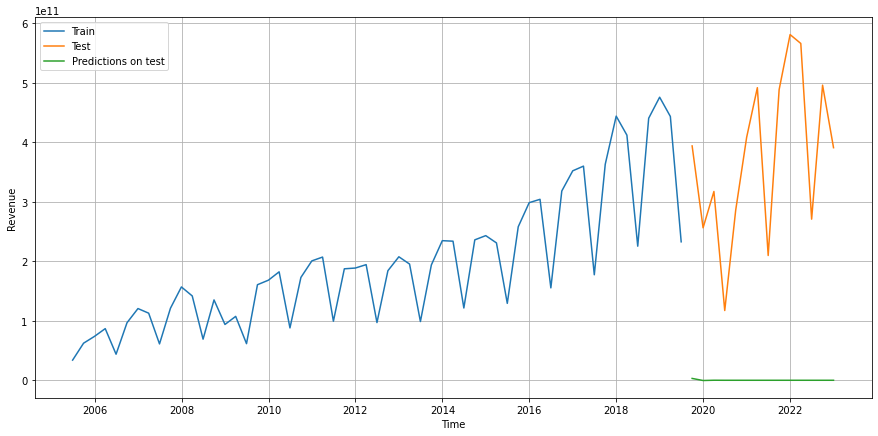

In [ ]:
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(predict, label='Predictions on test')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.grid();

In [ ]:
df1 = pd.DataFrame({'a' : [1,2,3,4,5], 'b' : [5,6,7,8,9]})
df1
df1[df1 == 5]

,a,b
0,NaN,5.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN


In [ ]:
s1 = pd.DataFrame({'a' : [1,2,3,4,6,8,10,12,15,18,21,24]}).squeeze()
s1.diff(periods=1).diff(periods=4)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
Name: a, dtype: float64

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train_lag1, trend='c', order=(1,1,1))

In [ ]:
# data['Total_Amount'][0:6].plot(kind='line',figsize=(20,8),grid=True, ylabel="Total_Amount")

In [ ]:
# dataSeries = data['Total_Amount'].copy()
# train=dataSeries[0:57].copy()
# test=dataSeries[int(len(data)*0.8):].copy()

In [ ]:
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(s_predict, label='Predictions on test')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.grid();

In [ ]:
data_df = data.copy()
data_df['date'] = data_df.index
data_df.head()

,Total_Amount,date
Time_Stamp,,
2005-06-30,3.386195e+10,2005-06-30
2005-09-30,6.229294e+10,2005-09-30
2005-12-31,7.379168e+10,2005-12-31
2006-03-31,8.675243e+10,2006-03-31
2006-06-30,4.378474e+10,2006-06-30
